In [1]:
import pandas as pd

# MODEL = 'paraphrase-distilroberta-base-v1'
MODEL = 'nli_clinical_bert'

EMBEDDING_PATH = '../sentence_embedding/tsv_files/exame_OSCE/cefaleia/' + MODEL + '/'
IMG_PATH = 'img/' + MODEL


import os.path

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

embeddings_df = pd.read_csv(EMBEDDING_PATH + 'word_embeddings.tsv', sep='\t',header=None)
# embeddings_df = pd.read_csv('../sentence_embedding/tsv_files/exame_OSCE/cefaleia/stsb-roberta-base/word_embeddings.tsv', sep='\t',header=None)
# embeddings_df = pd.read_csv('../sentence_embedding/tsv_files/paraphrase-distilroberta-base-v1/exame-OSCE/cefaleia/word_embeddings.tsv', sep='\t',header=None)

sentences_df = pd.read_csv(EMBEDDING_PATH + 'labels.tsv', sep='\t',header=None)
# sentences_df = pd.read_csv('../sentence_embedding/tsv_files/exame_OSCE/cefaleia/stsb-roberta-base/labels.tsv', sep='\t',header=None)

print(sentences_df)
embeddings_numpy = embeddings_df.to_numpy()
sentences_numpy = sentences_df.to_numpy()

X_embeddings = embeddings_numpy[:, :-1]

provas = []
for i in range(len(X_embeddings)):
    provas.append(i)
embeddings_df

                                                     0
0    location, onset, characteristics, radiation, a...
1    When investigating a headache, the onset, freq...
2    locate pain (laterality, region); assessment o...
3    Pain characteristics (location; intensity; dur...
4    clinical history- know in what context it aris...
..                                                 ...
108                       Headache with or without aur
109  The headache diagnostic approach should underg...
110  Non-pharmacological therapy: biofeedback with ...
111  Characterize the pain in terms of location, in...
112  Clinical history: onset of symptoms / characte...

[113 rows x 1 columns]


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,0.447343,-0.343146,0.218411,1.147695,-0.145658,-0.131758,0.027484,0.072224,0.346059,-0.631714,...,1.134069,-0.353833,-0.149659,0.197085,0.160925,0.006032,-0.057427,-0.727802,-0.348505,NaN
1,0.378171,-0.790414,0.458711,0.297382,0.422155,-0.668680,1.006022,-0.096534,0.577392,-0.277640,...,0.357554,1.151550,-0.273822,0.005145,-0.298826,0.017354,-0.743434,-0.445170,-0.622237,NaN
2,0.579448,-0.333298,-0.042743,0.795108,-0.302029,-0.257801,-0.305139,-0.119832,0.152242,-0.188193,...,0.337529,-0.288469,0.009001,0.073839,0.144560,0.527198,0.267433,-0.733828,-0.574577,NaN
3,0.231017,-0.255632,-0.054228,0.180291,-0.460682,0.132552,0.219686,0.302740,0.823282,-0.196006,...,0.850721,0.230991,-0.441917,0.568093,0.511808,0.407874,0.039436,-0.309849,-0.728362,NaN
4,0.368132,-0.918188,0.673563,0.621912,0.415882,0.233591,0.285549,0.300509,0.017700,-0.436811,...,0.527945,0.323026,0.019721,-0.436250,0.104770,0.337995,-0.004844,0.048812,-0.076286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.682630,0.297002,0.663002,0.116524,-0.058974,0.402705,-0.369008,-0.173253,0.158965,0.132995,...,0.609517,0.340716,-0.120515,0.426392,0.239195,-0.653668,-0.421530,0.591808,-0.742801,NaN
109,0.070863,-0.752483,0.705631,0.110093,0.498947,0.184266,-0.585584,0.133398,0.539396,-0.255829,...,0.081404,0.182877,-0.220331,0.307684,-0.201624,0.237371,0.147980,-0.200368,-0.794842,NaN
110,0.141474,0.276175,0.011989,0.403777,-1.124887,0.104293,-0.556553,0.086737,0.901901,0.340229,...,0.265871,0.119769,-0.010249,0.282935,-0.207620,0.484290,0.060910,0.590122,-0.730808,NaN
111,0.268505,0.070493,0.453567,0.070426,-0.597197,0.586869,0.582872,-0.034143,0.090447,0.371378,...,1.057664,0.691779,-0.217061,-0.175912,0.253346,0.615163,1.004366,-0.623879,-0.094788,NaN


In [2]:
sentences_df.get(0)[45]

'Characterize headache in terms of duration, when it started, if it has factors of relief or worsening and which, characteristics of pain, location of pain, if there is any pattern, how often has headache. Inquire about associated symptoms, such as photophobia, focal neurological signs, tiredness.'

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)
kmeans.fit(X_embeddings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(linkage='ward', n_clusters=7)
# agglomerative = AgglomerativeClustering(linkage='ward', distance_threshold=11, n_clusters=None)

agglomerative = agglomerative.fit(X_embeddings)

print(agglomerative.n_clusters_)
print(agglomerative.labels_)

7
[2 3 5 5 2 2 3 3 0 4 2 0 2 0 5 1 3 0 1 3 4 3 3 3 2 3 2 2 1 2 1 0 4 5 3 2 5
 2 4 3 5 5 2 3 5 3 0 2 6 3 4 3 0 4 3 2 3 0 2 0 2 1 3 6 4 3 4 0 4 0 2 0 0 0
 0 0 2 0 0 3 0 0 0 1 2 3 3 0 2 3 2 2 3 4 2 6 3 1 2 1 3 5 1 4 3 2 3 0 1 2 1
 5 2]


In [5]:
from matplotlib import pyplot as plt
import numpy as np

def plot_clustering(X, labels, title=None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(provas[i])+'.', color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold'})
        plt.scatter(X[i, 0], X[i, 1], color=plt.cm.nipy_spectral(labels[i] / 10.), s=40, cmap='hsv_r')

# Define os valores nos eixos
    plt.xticks([0,1.1])
    plt.yticks([0,1.1])
    plt.title(title, size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.savefig(IMG_PATH + title)

In [6]:
def plot_clustering_v2(X, labels, title=None):
    clustered_x = []
    clustered_y = []
    for x in X:
        clustered_x.append(x[0])
        clustered_y.append(x[1])
    
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(len(clustered_x)):
        plt.text(clustered_x[i], clustered_y[i], provas[i], color=plt.cm.nipy_spectral(labels[i] / 10.),
                         fontdict={'weight': 'bold'})

    plt.scatter(clustered_x, clustered_y, color=plt.cm.nipy_spectral(agglomerative.labels_ / 10.), s=40, cmap='hsv_r')
    plt.xticks([])
    plt.yticks([])

    plt.colorbar()

In [7]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [8]:
agglomerative.n_clusters_

7

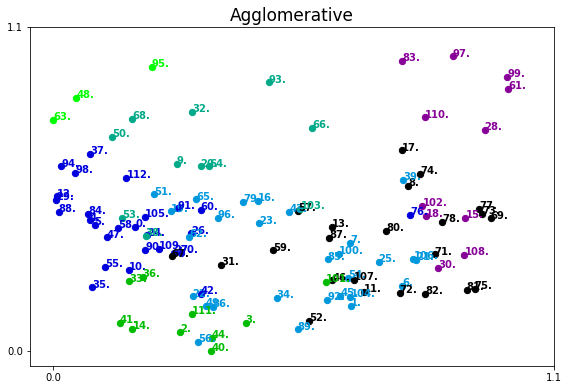

In [9]:
from sklearn import manifold


X_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(X_embeddings)

# plot_clustering(X_2d, kmeans.labels_, 'kmeans')
plot_clustering(X_2d, agglomerative.labels_, 'Agglomerative')
# plot_clustering_v2(X_2d, kmeans.labels_, 'kmeans')
# plot_clustering_v2(X_2d, agglomerative.labels_, 'Agglomerative')

In [10]:
# plot_dendrogram(agglomerative, truncate_mode='level', p=6)


In [11]:
documents_by_clusters = ['']*agglomerative.n_clusters_
size_clusters = [0]*agglomerative.n_clusters_

for i in range(len(agglomerative.labels_)):
    sentence = ''
    sentence = sentences_numpy[i] + ' | '
    documents_by_clusters[agglomerative.labels_[i]] += sentence
    size_clusters[agglomerative.labels_[i]] += 1
size_clusters

[23, 11, 27, 28, 11, 10, 3]

# TF - IDF

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.3)

# tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.3, max_features=20)
# tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.3, max_features=20)


In [14]:
# Considerando cada cluster como uma linha da tabela tfidf

from wordcloud import WordCloud, STOPWORDS 


documents_by_clusters_formato_tfidf = []
print(len(documents_by_clusters))
for d_c in documents_by_clusters:
    documents_by_clusters_formato_tfidf.append(str(d_c).split('[')[1].replace('[', '').replace(']\n', '').replace('\'', ''))

    
tfidfs = []
tfidf = tf_idf_vectorizer.fit_transform(documents_by_clusters_formato_tfidf)
feature_names = tf_idf_vectorizer.get_feature_names()

tfidf_matrix = tfidf.toarray()
# print(tfidf)
# print(tfidf_matrix[0])

i=0
topics_by_cluster = []
wordclouds = []
for d_c in documents_by_clusters_formato_tfidf:
#     print(d_c)
    print('Cluster: ', i)
    print('Size: ',size_clusters[i])
    
    sorted_index_array = np.argsort(tfidf_matrix[i]) 
#     highests = sorted_index_array
    highests = sorted_index_array[-10:]

    #     print(highests)

    topics = []
    print('Topics (ascending order):')
    for s in highests:
        print(feature_names[s])
        topics.append(feature_names[s])

# Tentando inverter os topics pra ficarem dos mais importante pros menos
#     topics = topics[-3:]
    
    topics_by_cluster.append(topics)

    dense = tfidf[i].todense()
    lst1 = dense.tolist()
    df = pd.DataFrame(lst1, columns=feature_names)
#     print(df)
    wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))
    wordclouds.append(wordcloud)

    print('\n Respostas:'+ documents_by_clusters[i])
#     print('documents_by_clusters' )
    
    i+=1

print(topics_by_cluster)


7
Cluster:  0
Size:  23
Topics (ascending order):
coin
pulsatile
intermittent
phonophobia
disorders
typically
30
unilateral
light
vision
['\n Respostas:Headache has several hypotheses for diagnosis, some clinics such as migraine / tension headache / cluster / cluster that should be treated with aines / amitripline / topiramate depending on the case. The remaining hypotheses whose diagnosis is not clinical should be pediatric MCDT: tac-ce (if falling, for example), blood count and biochemistry (suspicion of | Ask if you have photophobia, if you already have this type of pain, at what time of the year, if you have associated symptoms such as blurred vision, loss of vision, if you have any personal history that can influence arterial hypertension, if you are a woman ask a gynecological history , | important to clarify various information: headache location, how it started (gradual or sudden), how it describes the pain, if you have pain in another location (such as neck), how long ago red 

In [15]:
# # Considerando cada cluster como uma tabela tfidf
# from wordcloud import WordCloud, STOPWORDS 

# tf_idf_vectorizer = TfidfVectorizer(stop_words='english',)
# # tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.3)

# wordclouds = []
# tfidfs = []
# i = 0
# for d_c in  documents_by_clusters:
# #     print(d_c)
#     print('Cluster: ', i)
#     print('Size: ',size_clusters[i])
#     tfidf = tf_idf_vectorizer.fit_transform(d_c)
#     feature_names = tf_idf_vectorizer.get_feature_names()

#     tfidf_matrix = tfidf.toarray()

#     sorted_index_array = np.argsort(tfidf_matrix) 
    
#     # print(sorted_index_array[0])
# #     print(sorted_index_array[0][-10:])
#     highests = sorted_index_array[0][-10:]

#     print('Topics (ascending order):')
#     for s in highests:
#         print(feature_names[s])
#     print('\n')
#     i += 1
    
#     dense = tfidf.todense()
#     lst1 = dense.tolist()
#     df = pd.DataFrame(lst1, columns=feature_names)
    
#     wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))
#     wordclouds.append(wordcloud)
    

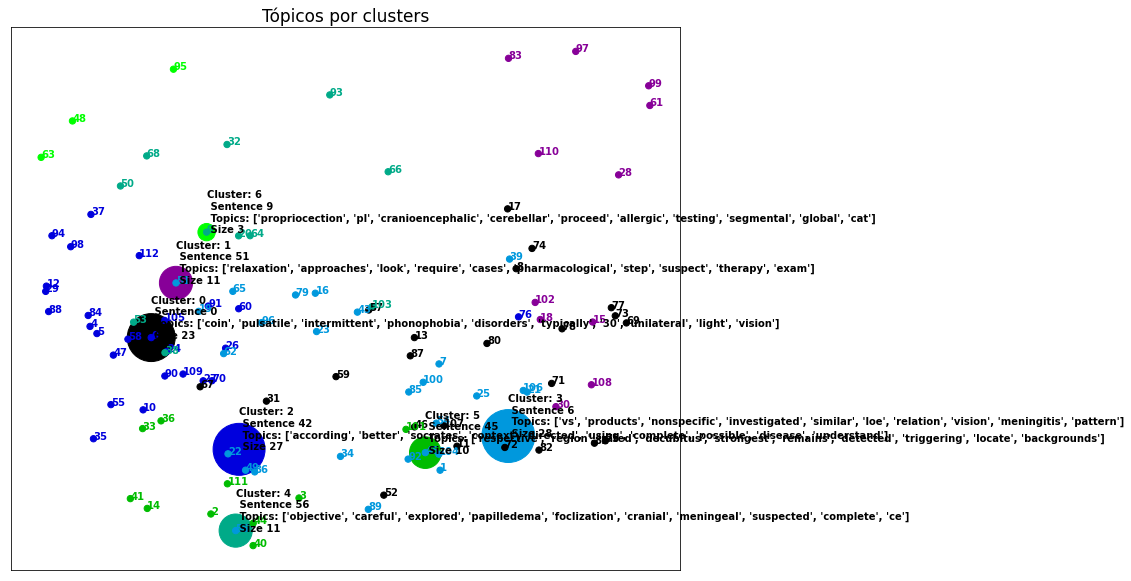

In [16]:
# FUncioanndo
#Usando amostras fixas de cada cluster como centroid
# sentence_amostras = [0, 6, 9, 42, 45, 51, 56]
sentence_amostras = [0, 51, 42, 6, 56, 45, 9]
X_centroids_2d = []
for i in sentence_amostras:
    X_centroids_2d.append(X_2d[i])

centroids_amostras_x = []
centroids_amostras_y = []
for x in X_centroids_2d:
    centroids_amostras_x.append(x[0])
    centroids_amostras_y.append(x[1])

    
x_2d = []
y_2d = []
for x in X_2d:
    x_2d.append(x[0])
    y_2d.append(x[1])
    
    
plt.figure(figsize=(12, 10))


    
for i in range(len(x_2d)):
    plt.text(x_2d[i], y_2d[i], provas[i], color=plt.cm.nipy_spectral(agglomerative.labels_[i] / 10.), fontdict={'weight': 'bold'})

# clusters_labels = [e_c for e_c in embeddings_by_clusters.keys()]
clusters_labels = [i for i in range(7)]
# print('clusters_labels '+str(clusters_labels))

for i in range(len(centroids_amostras_x)):
    label_str = 'Cluster: '+ str(clusters_labels[i]) + '\n Sentence ' + str(sentence_amostras[i]) + '\n Topics: ' + str(topics_by_cluster[i]) + '\n Size ' + str(size_clusters[i])
    plt.text(centroids_amostras_x[i], centroids_amostras_y[i], label_str, fontdict={'weight': 'bold'})

plt.scatter(centroids_amostras_x, centroids_amostras_y,  s=[i * 100 for i in size_clusters], color=plt.cm.nipy_spectral(np.array(clusters_labels) / 10.), cmap='hsv_r')
plt.scatter(x_2d, y_2d, color=plt.cm.nipy_spectral(agglomerative.labels_ / 10.), s=40, cmap='hsv_r')

plt.xticks([])
plt.yticks([])
# plt.axis('off')
plt.title('Tópicos por clusters', size=17)
# plt.tight_layout(rect=[1, 0.03, 0, 0.95])
plt.savefig(IMG_PATH + 'topicos_por_clusters')

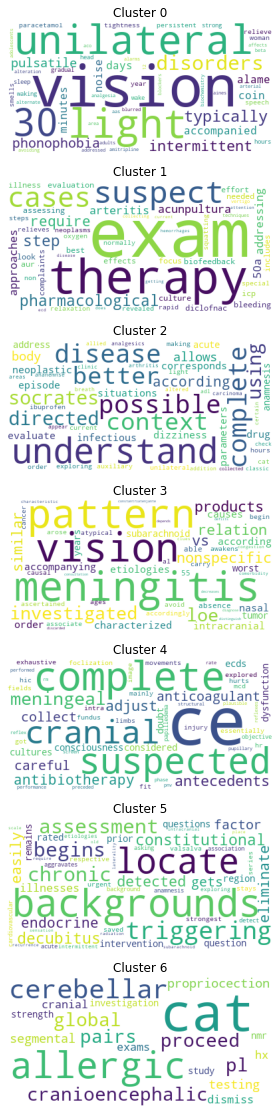

In [17]:
fig, axs = plt.subplots(agglomerative.n_clusters_, figsize=(10, 20))

for (i, (ax, wc)) in enumerate(zip(axs, wordclouds)):
    ax.set_title('Cluster '+str(i))
    ax.imshow(wc)
    ax.axis("off")
    
# fig.suptitle('Nuvens de palavras por cluster')
fig.savefig(IMG_PATH + 'wordclouds')
    



## BROKEN !!!!!!!!!

In [18]:
# BROKEN!!!!!!!!!!!!!!!!!!
# Tentando pegar o centroid de cada cluster via NearestCentroid
from sklearn.neighbors.nearest_centroid import NearestCentroid

print('agglomerative.labels_ ',len(agglomerative.labels_))
print(agglomerative.labels_)
clf = NearestCentroid()
clf.fit(X_embeddings, kmeans.labels_)

centroids = clf.centroids_
# print(centroids[0])
# print(clf.classes_)

X_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(centroids)


agglomerative.labels_  113
[2 3 5 5 2 2 3 3 0 4 2 0 2 0 5 1 3 0 1 3 4 3 3 3 2 3 2 2 1 2 1 0 4 5 3 2 5
 2 4 3 5 5 2 3 5 3 0 2 6 3 4 3 0 4 3 2 3 0 2 0 2 1 3 6 4 3 4 0 4 0 2 0 0 0
 0 0 2 0 0 3 0 0 0 1 2 3 3 0 2 3 2 2 3 4 2 6 3 1 2 1 3 5 1 4 3 2 3 0 1 2 1
 5 2]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [19]:
embeddings_by_clusters = {}

for x_e, label in zip(X_embeddings, agglomerative.labels_):
    if label in embeddings_by_clusters.keys():
        embeddings_by_clusters[label].append(x_e)
    else: 
        embeddings_by_clusters[label] = [x_e]

In [20]:
# # BROKEN tmbm
# # Pega os centroids via pairwise_distances_argmin_min. Quebrado tmbm

# from sklearn.metrics import pairwise_distances_argmin_min

# closests, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_embeddings)

# centroids = []
# for c in closests:
#     centroids.append(X_embeddings[c])

# # A cada execução muda o resultado
# X_centroids_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(centroids)

# print(X_centroids_2d)

In [21]:
# # BROKEN 
# # tentanto usar uma amostra de cada cluster como centroids
# amostra_dos_clusteres = []
# for k in embeddings_by_clusters:
#     print(k)
#     embeddings = embeddings_by_clusters[k]

#     amostra_dos_clusteres.append(embeddings[0]) 

# X_embeddings.append(amostra_dos_clusteres)
# X_centroids_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(amostra_dos_clusteres)
# X_centroids_2d

In [22]:
# ## BROKEN !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# # Plotar centroids
# centroids_x = []
# centroids_y = []
# for x in X_centroids_2d:
#     centroids_x.append(x[0])
#     centroids_y.append(x[1])

# print(len(centroids_x))
# cluster_labels = [0,1,2,3,4,5,6,7,9,10,5]
# print(cluster_labels)
# plt.scatter(centroids_x, centroids_y,  s=200, cmap='hsv_r')
# print(centroids_x)
# # plt.text(centroids_x, centroids_x, cluster_labels,
# #                          fontdict={'weight': 'bold'})

## Plot tfIDF 

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


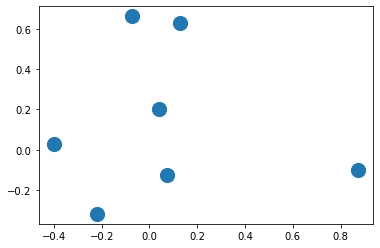

In [23]:
# BROKEN !!!!!!!!!!!!!!!!
# tfidf_matrix.shape


tfIdf_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(tfidf_matrix)
tfIdf_2d

tfidf_x = []
tfidf_y = []
for x in tfIdf_2d:
    tfidf_x.append(x[0])
    tfidf_y.append(x[1])

# for i in range(len(centroids_amostras_x)):
#     label_str = 'Cluster: '+ str(i) + '\n Topics: ' + str(topics_by_cluster[i])
#     plt.text(centroids_amostras_x[i], centroids_amostras_y[i], label_str, fontdict={'weight': 'bold'})

        
plt.scatter(tfidf_x, tfidf_y,  s=200, cmap='hsv_r')


In [24]:
with open('tsv_files/tfidf/exame_OSCE/cefaleia/word_embeddings.tsv', "w") as e_file, open('tsv_files/tfidf/exame_OSCE/cefaleia/labels.tsv', "w") as l_file:
    for answer, embedding in zip(documents_by_clusters_formato_tfidf, tfidf_matrix):
        tsv_row = ''
        for e in embedding:
            tsv_row += str(e) + '\t'

        print(tsv_row, file=e_file)   
        print(answer, file=l_file)